<a href="https://colab.research.google.com/github/Wincenttjoi/employee-data-visualization/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as scst
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url = 'https://raw.githubusercontent.com/Wincenttjoi/employee-data-visualization/main/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(url)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


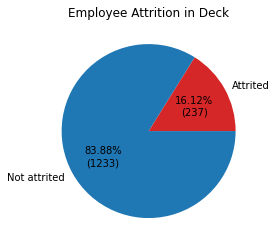

In [ ]:
### Pie chart of attrition rate
def my_fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, x*total/100)

total = df.shape[0]
count_attrition = df[df['Attrition'] == 'Yes'].shape[0]
count_attrition_no = total - count_attrition
counts = [count_attrition, count_attrition_no]
labels = ['Attrited', 'Not attrited']
plt.pie(counts, labels = labels, autopct=my_fmt, colors=["C3", "C0"])
plt.title('Employee Attrition in Deck')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


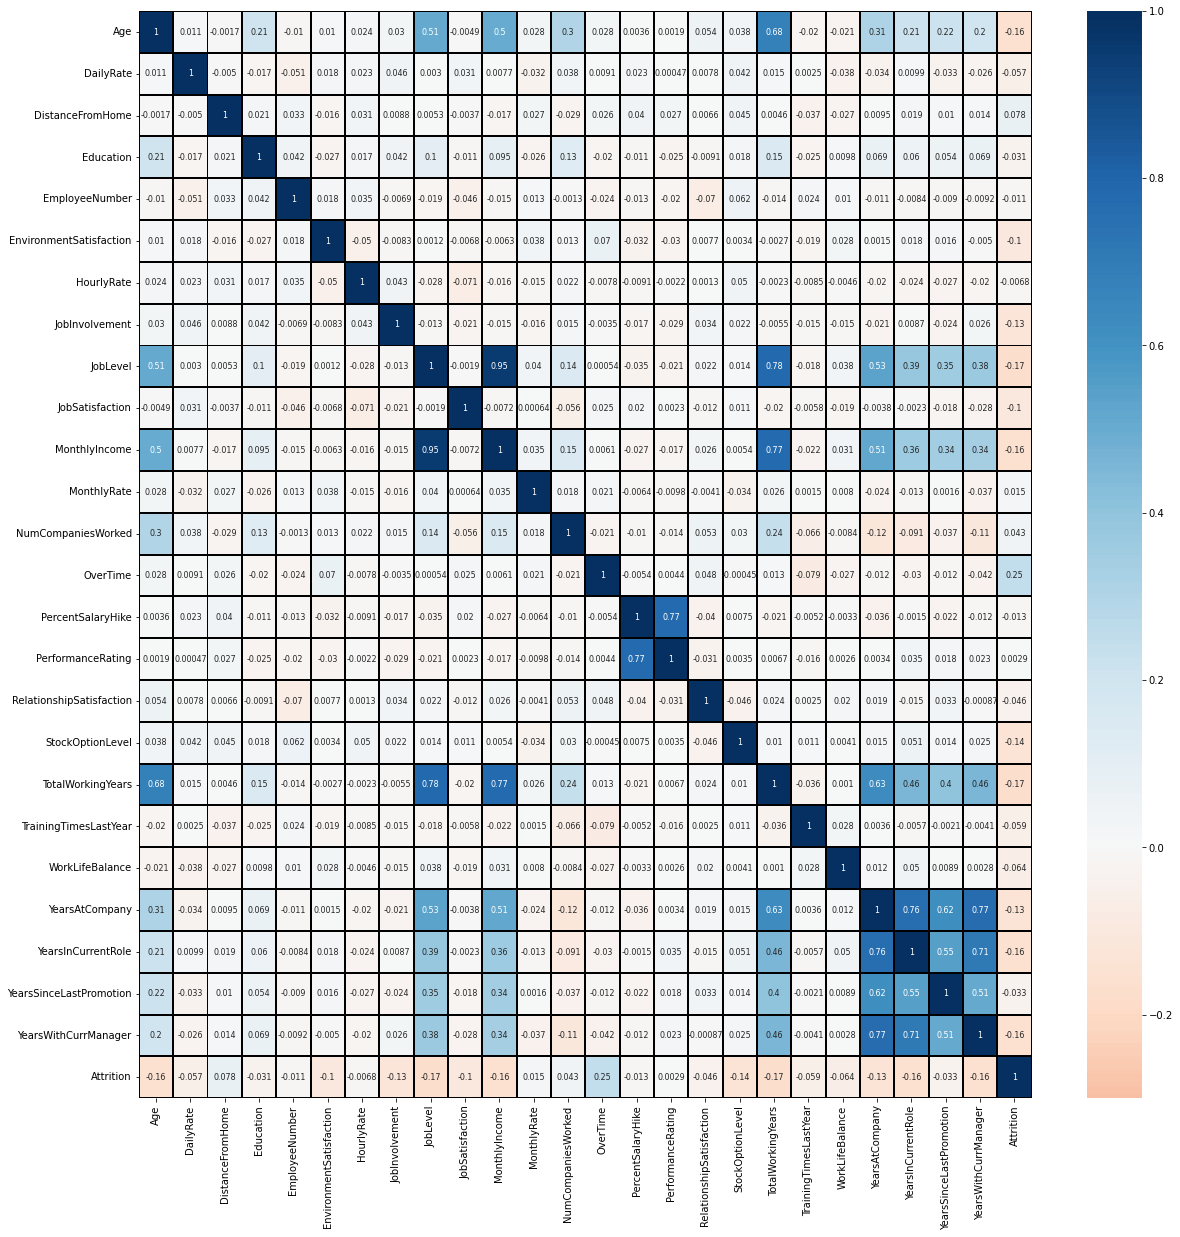

In [ ]:
df_numerical = df.select_dtypes("int")
df_numerical['OverTime'] = df['OverTime'].replace(['Yes', 'No'], [1,0])
df_numerical = df_numerical.join(df['Attrition'])
df_numerical['Attrition'] = df_numerical['Attrition'].replace(['Yes', 'No'], [1,0])
df_numerical['Attrition'] = df_numerical['Attrition'].astype(float)
corr_table = df_numerical.corr()
corr_table.drop(labels=['EmployeeCount', 'StandardHours'], inplace=True)
corr_table.drop(labels=['EmployeeCount', 'StandardHours'], axis=1, inplace=True)
plt.figure(figsize=(20,20))
sns.heatmap(corr_table, 
            annot=True, 
            cmap="RdBu", 
            center=0, 
            annot_kws={"size":8}, 
            vmin=-0.3, 
            vmax=1, 
            linewidth=1, 
            linecolor='black')
plt.show()

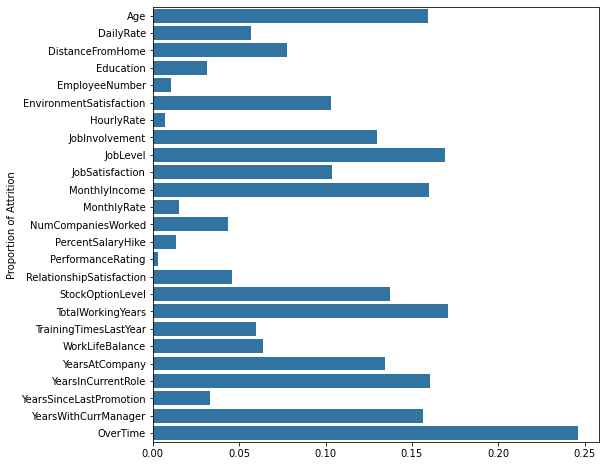

In [ ]:
plt.figure(figsize=(8,8))
df2 = df_numerical.drop(['Attrition', 'EmployeeCount', 'StandardHours'], axis = 1)
mod_value = abs(df2.corrwith(df_numerical['Attrition']))
ax = sns.barplot(x=mod_value, y=df2.corrwith(df_numerical['Attrition']).index, color="C0")
ax.set_ylabel("Proportion of Attrition")
plt.show()

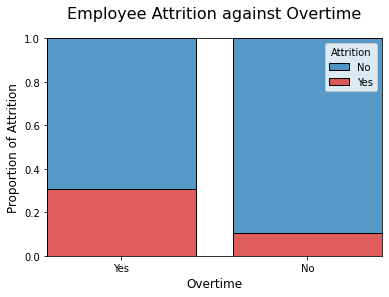

In [ ]:
### 100% stacked histogram of x=Overtime and y=attrition
p = sns.histplot(
    data=df,
    x="OverTime", hue="Attrition",
    hue_order=['No', 'Yes'], palette=["C0", "C3"],
    multiple="fill", stat="proportion",
    shrink=.8
)
p.set_ylabel("Proportion of Attrition", fontsize=12)
p.set_xlabel("Overtime", fontsize=12)
p.set_title("Employee Attrition against Overtime", fontsize=16, pad=20)
plt.show()

In [34]:
linear_reg_ot = df_numerical[['Attrition', 'Age', 'DistanceFromHome', 'StockOptionLevel', 'NumCompaniesWorked', 'JobLevel', 'OverTime', 'MonthlyIncome','YearsAtCompany', 'WorkLifeBalance']]

out = smf.ols('Attrition ~ Age + DistanceFromHome + StockOptionLevel + NumCompaniesWorked + JobLevel + OverTime + MonthlyIncome + YearsAtCompany + WorkLifeBalance', linear_reg_ot).fit()
print(out.summary())

# factors = factors_attrition[['MonthlyIncome','WorkLifeBalance', 'JobLevel', 'OverTime']]
factors = df_numerical[['Age', 'DistanceFromHome', 'StockOptionLevel', 'NumCompaniesWorked', 'JobLevel', 'OverTime', 'MonthlyIncome','YearsAtCompany', 'WorkLifeBalance']]
attrition = df_numerical[['Attrition']]

employee = LinearRegression().fit(factors, attrition)

before_change = employee.predict(np.array([[30, 5, 1, 2, 1, 1, 5000, 1, 3]]))
after_change = employee.predict(np.array([[30, 5, 1, 2, 1, 0, 5000, 1, 3]]))

print('The predicted attrition rate is', before_change)
print('The predicted attrition rate is', after_change)

                            OLS Regression Results                            
Dep. Variable:              Attrition   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     29.19
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           1.69e-45
Time:                        15:44:46   Log-Likelihood:                -368.32
No. Observations:                1035   AIC:                             756.6
Df Residuals:                    1025   BIC:                             806.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.5796      0

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


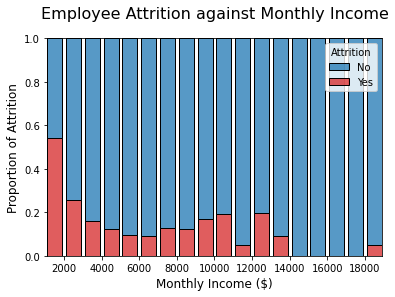

In [ ]:
### 100% stacked histogram of x=income and y=attrition
bins_hist = range(1000, 20000, 1000)
p = sns.histplot(
    data=df,
    bins = bins_hist,
    x="MonthlyIncome", hue="Attrition",
    multiple="fill", stat="proportion",
    shrink=.8, hue_order=['No', 'Yes'], palette=["C0", "C3"]
)
p.set_ylabel("Proportion of Attrition", fontsize=12)
p.set_xlabel("Monthly Income ($)", fontsize=12)
p.set_title("Employee Attrition against Monthly Income", fontsize=16, pad=20)
plt.show()

In [35]:
linear_reg_mi = df_numerical[df_numerical['MonthlyIncome'] < 7000]
linear_reg_ot = linear_reg_ot[['Attrition', 'Age', 'DistanceFromHome', 'StockOptionLevel', 'NumCompaniesWorked', 'JobLevel', 'OverTime', 'MonthlyIncome','YearsAtCompany', 'WorkLifeBalance']]

out = smf.ols('Attrition ~ Age + DistanceFromHome + StockOptionLevel + NumCompaniesWorked + JobLevel + OverTime + MonthlyIncome + YearsAtCompany + WorkLifeBalance', linear_reg_ot).fit()
print(out.summary())

factors_attrition= df[['Attrition', 'Age', 'DistanceFromHome', 'StockOptionLevel', 'NumCompaniesWorked', 'JobLevel', 'OverTime', 'MonthlyIncome','YearsAtCompany', 'WorkLifeBalance']]
factors_attrition['Attrition'] = factors_attrition['Attrition'].replace(['Yes', 'No'], [1,0])

factors = factors_attrition[['Age', 'DistanceFromHome', 'StockOptionLevel', 'NumCompaniesWorked', 'JobLevel', 'OverTime', 'MonthlyIncome','YearsAtCompany', 'WorkLifeBalance']]
factors = factors[factors['MonthlyIncome'] < 7000]
attrition = factors_attrition.loc[factors_attrition['MonthlyIncome'] < 7000, 'Attrition']

employee = LinearRegression().fit(factors, attrition)

before_change = employee.predict(np.array([[30, 5, 1, 2, 1, 0, 1500, 1, 3]]))
after_change = employee.predict(np.array([[30, 5, 1, 2, 1, 0, 2500, 1, 3]]))

print('The predicted attrition rate is',before_change)
print('The predicted attrition rate is',after_change)

                            OLS Regression Results                            
Dep. Variable:              Attrition   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     29.19
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           1.69e-45
Time:                        15:45:20   Log-Likelihood:                -368.32
No. Observations:                1035   AIC:                             756.6
Df Residuals:                    1025   BIC:                             806.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.5796      0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


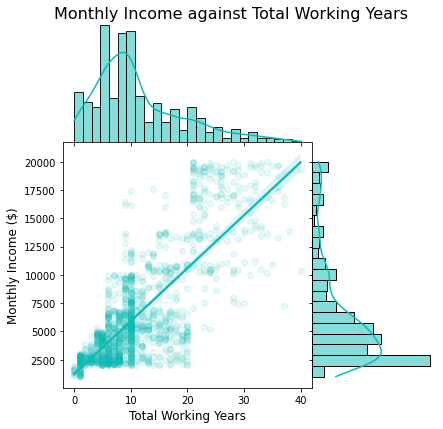

In [ ]:
p = sns.jointplot(x=df['TotalWorkingYears'], y=df['MonthlyIncome'], kind='reg', 
             ratio = 2, space = 0, color = '#0CBBB5', joint_kws = {'scatter_kws':dict(alpha=0.1)})
# sns.regplot(data=df, x='points', y='assists').set(title='Points vs. Assists')
p.set_axis_labels('Total Working Years', 'Monthly Income ($)', fontsize=12)
p.fig.suptitle("Monthly Income against Total Working Years", fontsize=16)
p.fig.subplots_adjust(top=0.95)
plt.show()

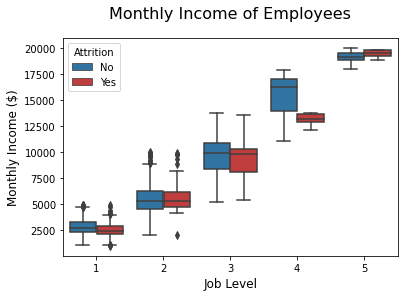

In [ ]:
###### Monthly income and job level

### Monthly income vs job level -> Monthly income is correlated to job level

p = sns.boxplot(y='MonthlyIncome', x='JobLevel', hue='Attrition', data=df, hue_order=['No', 'Yes'], palette=["C0", "C3"])

p.set_ylabel("Monthly Income ($)", fontsize=12)
p.set_xlabel("Job Level", fontsize=12)
p.set_title("Monthly Income of Employees", fontsize=16, pad=20)
plt.show()

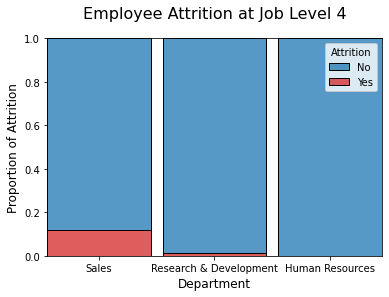

In [ ]:
### Histogram for Department with attrition where JobLevel = 4
p = sns.histplot(
    data=df.where(df["JobLevel"] == 4),
    bins = bins_hist,
    x="Department", hue="Attrition", hue_order=['No', 'Yes'], palette=["C0", "C3"],
    multiple="fill", stat="proportion",
    shrink=.9
)
p.set_ylabel("Proportion of Attrition", fontsize=12)
p.set_xlabel("Department", fontsize=12)
p.set_title("Employee Attrition at Job Level 4", fontsize=16, pad=20)
plt.show()

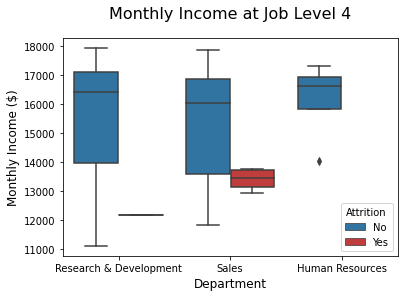

In [ ]:
### Box plot for y = Income, x = Department, hue = Attrition when joblevel = 4
ax = sns.boxplot(y='MonthlyIncome', x='Department', hue='Attrition', 
            data=df.where(df['JobLevel'] == 4), hue_order=['No', 'Yes'], 
            palette=["C0", "C3"], order=['Research & Development', 'Sales', 'Human Resources'])
ax.set_ylabel("Monthly Income ($)", fontsize=12)
ax.set_xlabel("Department", fontsize=12)
plt.title("Monthly Income at Job Level 4", fontsize=16, pad=20)
# plt.xticks(rotation=10)
plt.show()

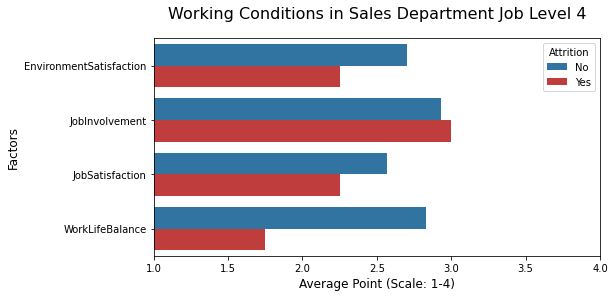

Since pvalue = 0.011348729743623472 is smaller than significance level of 0.05 , we reject null hypothesis and have sufficient evidence conclude that mean of EnvironmentSatisfaction of attrited employees is lesser than those employees who stay
Since pvalue = 0.30825311842017294 is greater than significance level of 0.05 , we do not reject null hypothesis and have insufficient evidence to conclude that mean of JobInvolvement of attrited employees is lesser than those employees who stay
Since pvalue = 0.013590064203149342 is smaller than significance level of 0.05 , we reject null hypothesis and have sufficient evidence conclude that mean of WorkLifeBalance of attrited employees is lesser than those employees who stay
Since pvalue = 1.2869621479684972e-08 is smaller than significance level of 0.05 , we reject null hypothesis and have sufficient evidence conclude that mean of JobSatisfaction of attrited employees is lesser than those employees who stay


In [ ]:
f, ax = plt.subplots(figsize=(8,4))

sales = df.loc[(df['Department'] == 'Sales') & (df['JobLevel'] == 4), ['EnvironmentSatisfaction', 'JobInvolvement', 'WorkLifeBalance', 'JobSatisfaction']]
sales_df = sales.reset_index().melt('index', var_name='Factors', value_name='avg')
sales_df = sales_df.set_index('index').join(df['Attrition'])
sales_df = sales_df.groupby(['Attrition', 'Factors']).agg(avg = ("avg", 'mean'))
sales_df = sales_df.reset_index()

sns.barplot(x="avg", y="Factors", hue="Attrition", data=sales_df, palette=["C0", "C3"])
ax.set(xlim=(1,4))
ax.set_ylabel("Factors", fontsize=12)
ax.set_xlabel("Average Point (Scale: 1-4)", fontsize=12)
ax.set_title("Working Conditions in Sales Department Job Level 4", fontsize=16, pad=20)
plt.show()

def conduct_hypothesis_testing():
  sales_not_attr_avg = np.array(sales_df.loc[sales_df['Attrition'] == 'No', "avg"])
  sales_attr_avg = np.array(sales_df.loc[sales_df['Attrition'] == 'Yes', "avg"])
  n = np.array(sales.count())
  sd = np.array(sales.std())
  zvalue = (sales_attr_avg  - sales_not_attr_avg) / (sd / n**0.5)
  pvalue = scst.norm.sf(abs(zvalue))

  sig_level = 0.05
  for i in range(len(pvalue)):
      if pvalue[i] < sig_level:
          print("Since pvalue =", pvalue[i], "is smaller than significance level of", sig_level, ", we reject null hypothesis and have sufficient evidence conclude that mean of", sales.columns[i], 
                "of attrited employees is lesser than those employees who stay")
      else:
          print("Since pvalue =", pvalue[i], "is greater than significance level of", sig_level, ", we do not reject null hypothesis and have insufficient evidence to conclude that mean of", sales.columns[i], 
          "of attrited employees is lesser than those employees who stay")
  

conduct_hypothesis_testing()

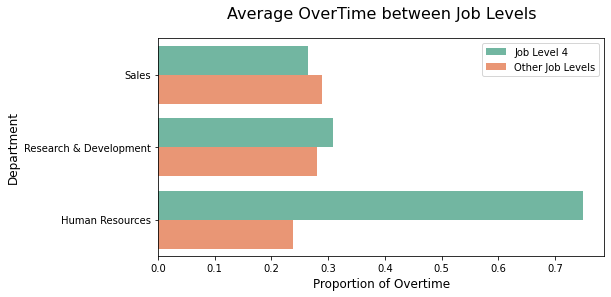

In [ ]:
f, ax = plt.subplots(figsize=(8,4))
df['OverTime'] = df['OverTime'].replace(['Yes', 'No'], [1,0])
sales_lvl4 = df.loc[df['JobLevel'] == 4, ['OverTime', 'Department']]
sales_lvl4['JobLevel4'] = 'Yes'
sales_alllvl = df.loc[df['JobLevel'] != 4, ['OverTime', 'Department']]
sales_alllvl['JobLevel4'] = 'No'
sales_combine = sales_lvl4.append(sales_alllvl)
ax = sns.barplot(x='OverTime', y='Department', data=sales_combine, hue='JobLevel4', palette="Set2", ci=None)
ax.set_ylabel("Department", fontsize=12)
ax.set_xlabel("Proportion of Overtime", fontsize=12)
plt.legend(loc='upper right', labels=['Job Level 4', 'Other Job Levels'])
plt.title("Average OverTime between Job Levels", fontsize=16, pad=20)
plt.show()

Interesting finding, sales job level 4 OT less but have such a bad worklife balance, whereas HR high OT but not much attrition issue. Factor might be due to high stress in sales and not so much about long working hours. 

Solution: Investigate and have integrated sessions between HR and Sales to solve this issue, discuss what could've been better.